In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import image
import matplotlib.pyplot as plt

In [2]:
#Checking format of tensorflow dataset

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

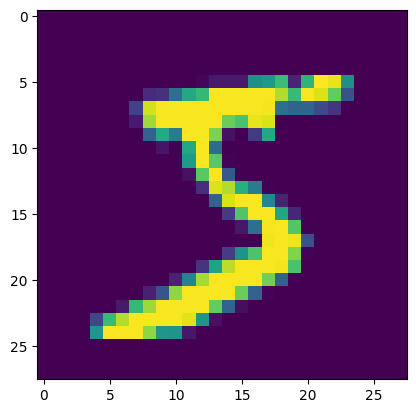

In [3]:
x_train
plt.imshow(x_train[0])

In [4]:
# Creating numpy arrays from kaggle dataset
import os

In [5]:
# Checking loop through all images
count1=0
count2=0
for i in range(9):
    directory1=f"DevanagariHandwrittenDigitDataset/Train/digit_{i}"
    directory2=f"DevanagariHandwrittenDigitDataset/Test/digit_{i}"
    for filename in os.listdir(directory1):
        f = os.path.join(directory1, filename)
        # checking if it is a file
        if os.path.isfile(f):
            count1=count1+1
    for filename in os.listdir(directory2):
        f = os.path.join(directory2, filename)
        # checking if it is a file
        if os.path.isfile(f):
            count2=count2+1
    
print(count1)
print(count2)

15300
2700


In [6]:
#Defining numpy array for 15,300 images each 32x32 pixel size

X_train=np.zeros((15300,32,32))
X_test=np.zeros((2700,32,32))
Y_train=np.zeros((15300,))
Y_test=np.zeros((2700,))

In [7]:
#Reading images
index_train=0
index_test=0
for i in range(9):
    directory_train=f"DevanagariHandwrittenDigitDataset/Train/digit_{i}"
    directory_test=f"DevanagariHandwrittenDigitDataset/Test/digit_{i}"
    for filename in os.listdir(directory_train):
        f = os.path.join(directory_train, filename)
        # checking if it is a file
        if os.path.isfile(f):
            img= image.imread(f)
            X_train[index_train]=img
            Y_train[index_train]=i
            index_train=index_train+1
    for filename in os.listdir(directory_test):
        f = os.path.join(directory_test, filename)
        # checking if it is a file
        if os.path.isfile(f):
            img= image.imread(f)
            X_test[index_test]=img
            Y_test[index_test]=i
            index_test=index_test+1

6.0

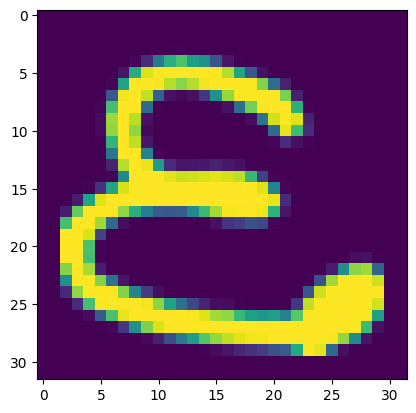

In [8]:
#Testing if data is read correctly

plt.imshow(X_test[2000])
Y_test[2000]

In [9]:
print(X_train[10])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [10]:
print(X_train[10].shape)

(32, 32)


In [59]:
# setting up layers for Neural Network
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32)),
    keras.layers.Dense(50, activation = 'relu'),    # Number of neurons = 50
    keras.layers.Dense(30, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')   # output layer, number of neurons = number of classes of classiying classes(0-9)
])

In [60]:
# compiling the model

model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
# labels 0-9 integers but if we had outputs as One Hot Encoder[0-1] then we had to use loss= 'categorical_crossentropy'

In [61]:
# training the neural network we have
model.fit(X_train, Y_train, epochs = 10)

Epoch 1/10
479/479 [==============================] - 3s 3ms/step - loss: 0.3635 - accuracy: 0.8912
Epoch 2/10
479/479 [==============================] - 2s 4ms/step - loss: 0.1162 - accuracy: 0.9668
Epoch 3/10
479/479 [==============================] - 2s 3ms/step - loss: 0.0752 - accuracy: 0.9786
Epoch 4/10
479/479 [==============================] - 2s 3ms/step - loss: 0.0539 - accuracy: 0.9841
Epoch 5/10
479/479 [==============================] - 2s 3ms/step - loss: 0.0411 - accuracy: 0.9885
Epoch 6/10
479/479 [==============================] - 2s 3ms/step - loss: 0.0312 - accuracy: 0.9915
Epoch 7/10
479/479 [==============================] - 2s 4ms/step - loss: 0.0227 - accuracy: 0.9941
Epoch 8/10
479/479 [==============================] - 2s 4ms/step - loss: 0.0163 - accuracy: 0.9957
Epoch 9/10
479/479 [==============================] - 2s 4ms/step - loss: 0.0182 - accuracy: 0.9945
Epoch 10/10
479/479 [==============================] - 2s 4ms/step - loss: 0.0153 - accuracy: 0.9951

In [62]:
loss, accuracy = model.evaluate(X_test, Y_test)

85/85 [==============================] - 0s 3ms/step - loss: 0.0711 - accuracy: 0.9819


8.0

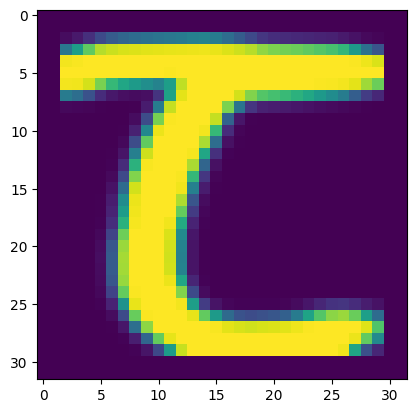

In [63]:
# Display first data point in X_test
plt.imshow(X_test[2500])
Y_test[2500]

In [64]:
y_pred = model.predict(X_test)
# it gives prediction probability of particular data entry for each class

85/85 [==============================] - 0s 2ms/step


In [65]:
print(y_pred.shape)

(2700, 10)


In [66]:
print(y_pred[2500])

[6.9781196e-15 1.7444951e-15 1.4968993e-09 9.7027367e-14 2.3067869e-11
 1.3786738e-21 2.9594596e-15 2.8938497e-15 1.0000000e+00 7.5971834e-17]


Here the 9th value 1.0000000e+00 is the highest probability which is of the label '8'

In [67]:
# converting prediction probabilities to class label
label_for_first_image = np.argmax(y_pred[0])
label_for_first_image

0

In [68]:
# converting prediction probabilties to class label for all test data points
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 7,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [69]:
print(y_pred)

[[9.99999404e-01 2.72400946e-08 8.38391509e-12 ... 3.55223818e-07
  1.79856656e-07 1.71177742e-11]
 [1.00000000e+00 1.06672476e-10 1.25421768e-13 ... 7.36678807e-09
  1.25460003e-10 4.05696662e-13]
 [9.99999404e-01 1.43193812e-08 1.21426402e-09 ... 3.94228472e-08
  5.65784660e-07 2.76735596e-11]
 ...
 [1.01264591e-13 2.29236084e-15 9.50214485e-09 ... 1.25980607e-21
  1.00000000e+00 2.13203950e-17]
 [2.36117653e-10 8.19830800e-11 1.39975835e-08 ... 2.32328515e-17
  1.00000000e+00 1.08769601e-13]
 [2.14017071e-09 4.53116478e-09 1.38594232e-05 ... 8.69545389e-16
  9.99985814e-01 2.22005877e-12]]


y_test -----> True Label 

y_pred_labels ----> Predicted Labels


In [70]:
# confusion matrix(true values, predicted values)
from tensorflow.math import confusion_matrix
conf_mat = confusion_matrix(Y_test, y_pred_labels)
conf_mat

<tf.Tensor: shape=(9, 9), dtype=int32, numpy=
array([[299,   0,   0,   0,   0,   0,   0,   1,   0],
       [  0, 298,   0,   0,   1,   0,   0,   1,   0],
       [  1,   1, 287,   6,   1,   2,   1,   1,   0],
       [  0,   0,   7, 290,   0,   3,   0,   0,   0],
       [  0,   0,   0,   1, 297,   1,   1,   0,   0],
       [  0,   0,   4,   1,   1, 290,   4,   0,   0],
       [  0,   2,   1,   1,   0,   0, 295,   0,   1],
       [  0,   0,   0,   1,   1,   2,   0, 296,   0],
       [  0,   0,   0,   1,   0,   0,   0,   0, 299]])>

Text(0.5, 47.7222222222222, 'Predicted Labels')

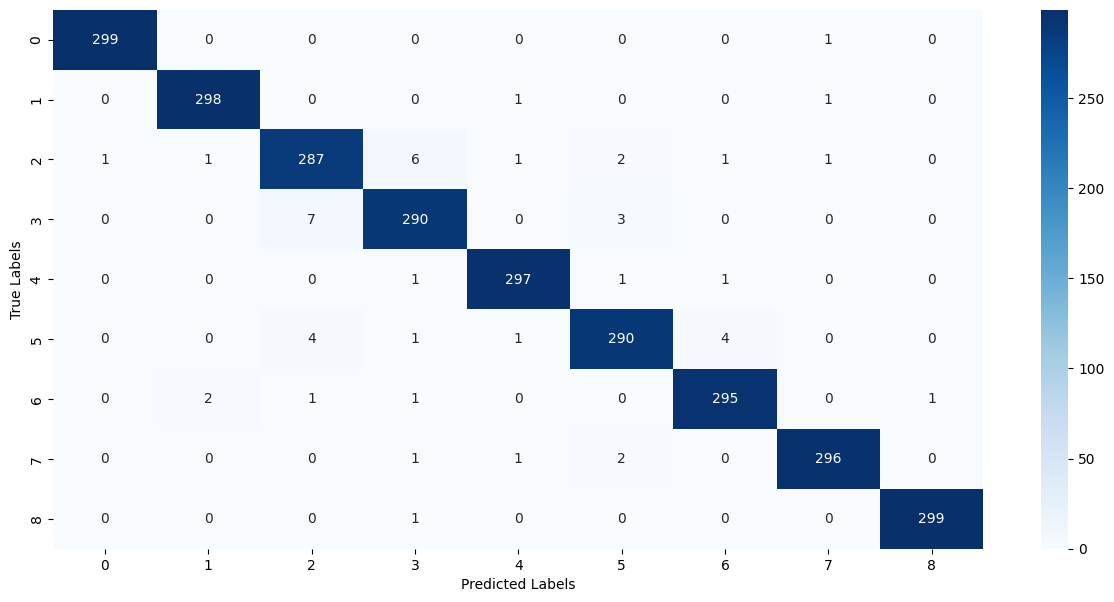

In [71]:
import seaborn as sns
plt.figure(figsize = (15,7))
sns.heatmap(conf_mat, annot = True, fmt = 'd', cmap = 'Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

In [72]:
# Building Predictive System
import cv2
input_image_path = 'DevanagariHandwrittenDigitDataset/Train/digit_9/10402.png'
input_image = cv2.imread(input_image_path)

In [73]:
type(input_image)

numpy.ndarray

In [74]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [75]:
input_image.shape

(32, 32, 3)

In [76]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
input_image_resize = cv2.resize(grayscale,(32,32))

In [77]:
input_image_resize.shape

(32, 32)

In [78]:
input_image_resize = input_image_resize/255     # converting individual image detail to 0-1
image_reshaped= np.reshape(input_image_resize, [1,32,32])     # notifying model that 1 data of size (28,28) is provided

In [79]:
input_pred = model.predict(image_reshaped)
input_pred

1/1 [==============================] - 0s 40ms/step


array([[2.3058162e-08, 1.7771326e-03, 7.3713147e-07, 5.7098620e-10,
        8.2117695e-01, 8.4657038e-12, 3.2800635e-05, 5.1319393e-08,
        1.7701232e-01, 1.0475810e-10]], dtype=float32)

In [80]:
input_pred_label = np.argmax(input_pred)
input_pred_label

4

Saving Model

In [81]:
model_version = 1
model.save(f"models/{model_version}")

INFO:tensorflow:Assets written to: models/1\assets
